<a href="https://colab.research.google.com/github/knuteriksen/VisionPorComputador/blob/main/GenderRecognition100_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check which GPU Google gives you - just for fun

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7196a1ad-0a2a-f06e-4b33-4b9699f9cccd)


Install keras

In [ ]:
!pip3 install keras

Imports needed


In [ ]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from keras.optimizers import SGD, Adam

from keras.callbacks import LearningRateScheduler as LRS
from keras.preprocessing.image import ImageDataGenerator
import os


Definitions, and extractions and preprprocessing of training and test dada

In [ ]:
## Definitions
num_classes = 2

# Download training and test sets
os.system('wget https://www.dropbox.com/s/zcwlujrtz3izcw8/gender.tgz')
os.system('tar xvzf gender.tgz')


# Load
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')

y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')


# Print out information
print("X train: ", x_train.shape)
print("Y train: ", y_train.shape)
print("X test:  ", x_test.shape)
print("Y test:  ", y_test.shape)

## Transforms
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

x_train /= 255
x_test /= 255

print("X train: ", x_train.shape)
print("Y train: ", y_train.shape)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X train:  (10585, 100, 100, 3)
Y train:  (10585,)
X test:   (2648, 100, 100, 3)
Y test:   (2648,)
X train:  (10585, 100, 100, 3)
Y train:  (10585,)


Building of model

In [ ]:
model = Sequential()
model.add(keras.Input(shape=x_train.shape[1:]))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(BN())
model.add(Conv2D(filters=16, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(BN())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(BN())
model.add(Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(BN())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(BN())
model.add(Conv2D(filters=64, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(BN())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

Display model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 16)      2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 50, 32)        1

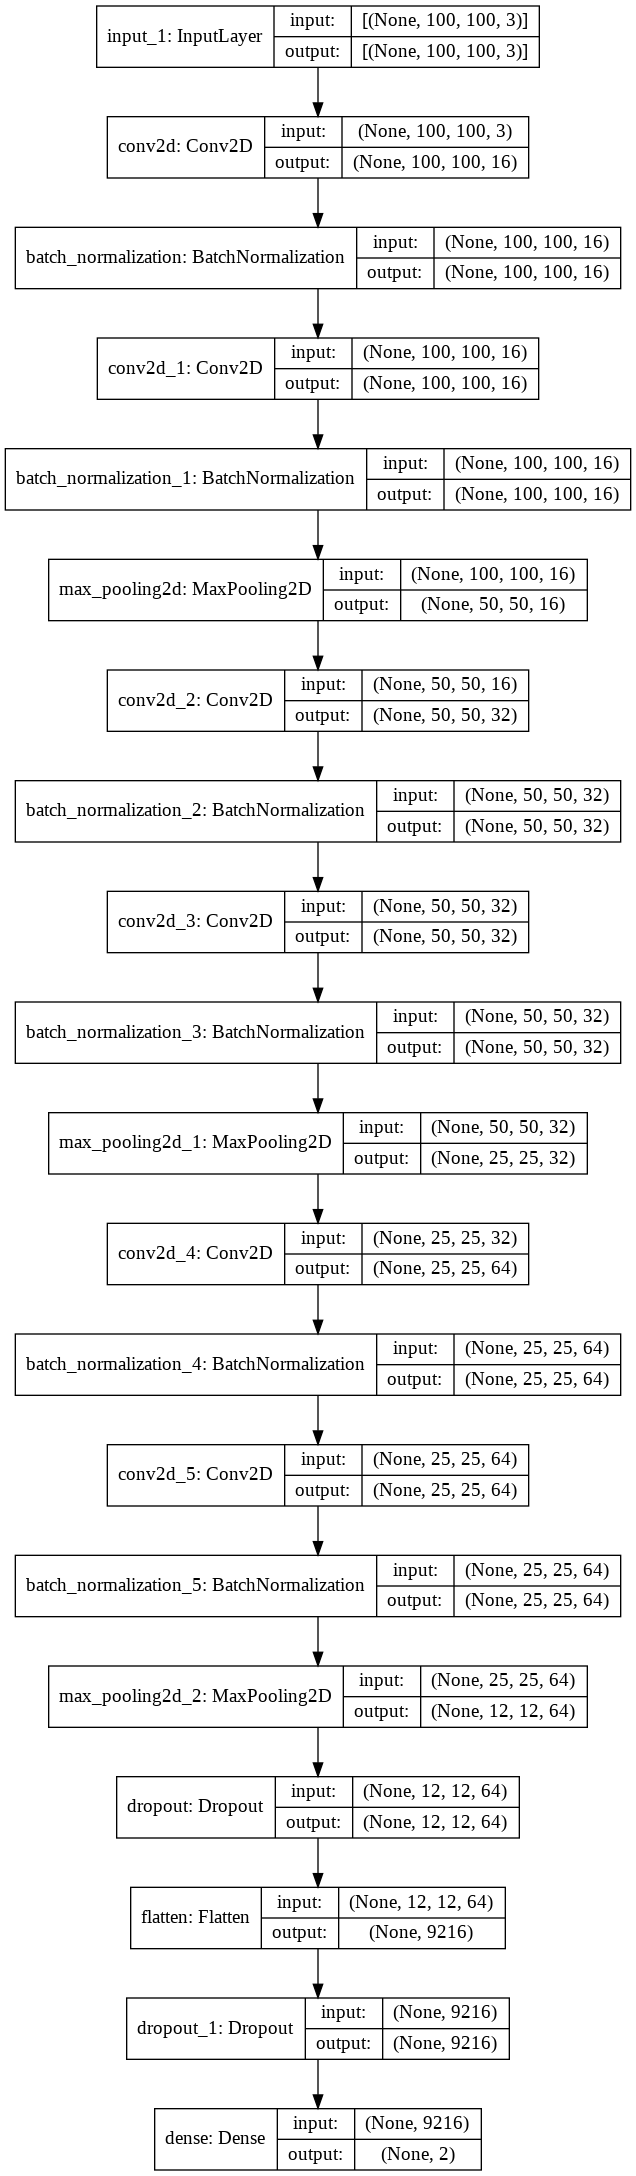

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

Compile model

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.0001),
              metrics=["accuracy"])


datagen = ImageDataGenerator(
  width_shift_range=0.2,
  height_shift_range=0.2,
  rotation_range=20,
  zoom_range=[1.0,1.2],
  horizontal_flip=True
  )

def multiple_data_generator(generator, X,Y,bs):
    genX = generator.flow(X, Y, batch_size=bs)
    while True:
      [Xi,Yi] = genX.next()
      yield   Xi,Yi

Training

In [ ]:
batch_size = 73

history=model.fit(x=multiple_data_generator(datagen, x_train, y_train, batch_size),
                  epochs=150,
                  steps_per_epoch = len(x_train) / batch_size,                 
                  validation_data=(x_test, y_test),
                  verbose=1
)

Epoch 1/150
145/145 [==============================] - 60s 187ms/step - loss: 1.6000 - accuracy: 0.6753 - val_loss: 0.7195 - val_accuracy: 0.4135
Epoch 2/150
145/145 [==============================] - 26s 182ms/step - loss: 1.2530 - accuracy: 0.7139 - val_loss: 0.5573 - val_accuracy: 0.7761
Epoch 3/150
145/145 [==============================] - 26s 183ms/step - loss: 1.1065 - accuracy: 0.7227 - val_loss: 0.6097 - val_accuracy: 0.7912
Epoch 4/150
145/145 [==============================] - 27s 184ms/step - loss: 0.9863 - accuracy: 0.7428 - val_loss: 0.4709 - val_accuracy: 0.8104
Epoch 5/150
145/145 [==============================] - 27s 184ms/step - loss: 0.8436 - accuracy: 0.7624 - val_loss: 0.4889 - val_accuracy: 0.8350
Epoch 6/150
145/145 [==============================] - 27s 185ms/step - loss: 0.7975 - accuracy: 0.7612 - val_loss: 0.4556 - val_accuracy: 0.8240
Epoch 7/150
145/145 [==============================] - 26s 184ms/step - loss: 0.7581 - accuracy: 0.7698 - val_loss: 0.4459 -

Testing

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

83/83 [==============================] - 1s 7ms/step - loss: 0.0762 - accuracy: 0.9713
Test loss: 0.07620980590581894
Test accuracy: 0.9712991118431091


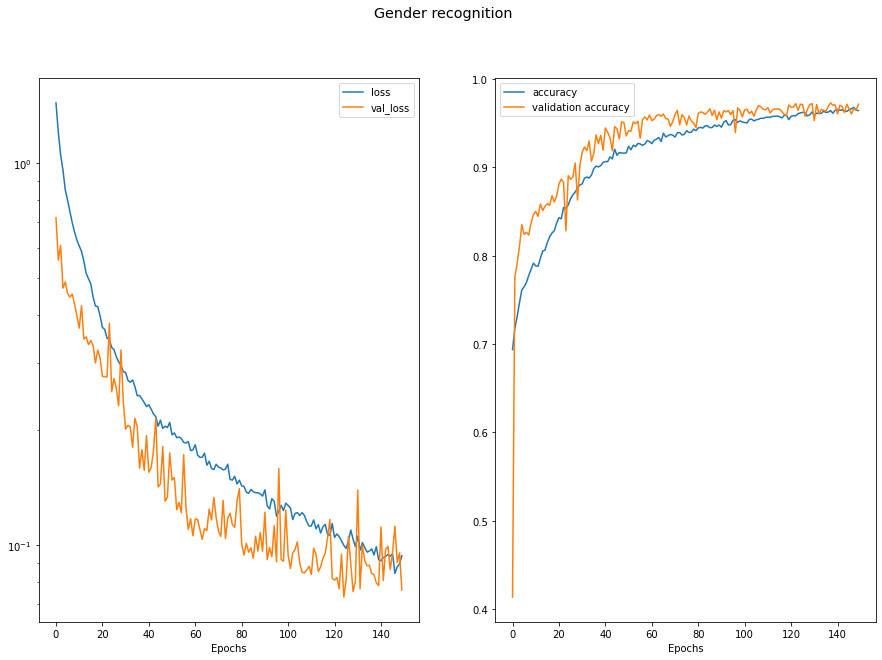

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.set_yscale('log')
ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()

ax2.plot(history.history['accuracy'], label="accuracy")
ax2.plot(history.history['val_accuracy'], label="validation accuracy")
ax2.legend()

plt.setp(ax1, xlabel='Epochs')
plt.setp(ax2, xlabel='Epochs')
f.suptitle('Gender recognition', fontsize='x-large')
plt.show();